In [225]:
import numpy as np
import pandas as pd
from datetime import timedelta

%matplotlib inline
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)

### Initial plot from March 8

In [11]:
data = pd.read_csv('time_series_19-covid-Confirmed.csv')

# data from https://systems.jhu.edu/research/public-health/ncov/

In [13]:
data.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20'],
      dtype='object')

In [17]:
mydata = data[data['Country/Region'].isin(['Italy','Spain','France','Germany'])]

In [22]:
mydata

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20
41,NaN,France,47.0,2.0,0,0,2,3,3,3,...,57,100,130,191,204,285,377,653,949,1126
52,NaN,Germany,51.0,9.0,0,0,0,0,0,1,...,48,79,130,159,196,262,482,670,799,1040
58,NaN,Italy,43.0,12.0,0,0,0,0,0,0,...,888,1128,1694,2036,2502,3089,3858,4636,5883,7375
62,NaN,Spain,40.0,-4.0,0,0,0,0,0,0,...,32,45,84,120,165,222,259,400,500,673


In [27]:
ts = mydata.T.iloc[4:]
ts.columns = ['France','Germany','Italy','Spain']

In [45]:
ts['Date']= pd.to_datetime(ts.index) 

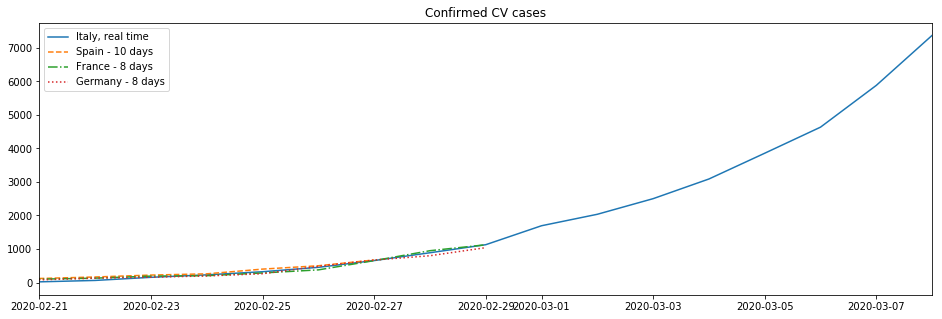

In [72]:
plt.figure(figsize=(16,5))
plt.plot(ts.Date[30:], ts.Italy[30:], '-', label = 'Italy, real time')
plt.plot(ts.Date[30:] + timedelta(days=-10), ts.Spain[30:], '--', label = 'Spain - 10 days')
plt.plot(ts.Date[30:] + timedelta(days=-8), ts.France[30:], '-.',label = 'France - 8 days')
plt.plot(ts.Date[30:] + timedelta(days=-8), ts.Germany[30:], ls = 'dotted',label = 'Germany - 8 days')
plt.xlim('2020-02-21','2020-03-08')
plt.title('Confirmed CV cases')
plt.legend()
plt.savefig('CVcases.png')


### Automatic download starts here

In [332]:
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv

--2020-03-22 19:06:41--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv
Resolving raw.githubusercontent.com... 151.101.132.133
Connecting to raw.githubusercontent.com|151.101.132.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81207 (79K) [text/plain]
Saving to: ‘time_series_19-covid-Confirmed.csv.9’

time_series_19-covi 100%[===================>]  79.30K  --.-KB/s    in 0.04s   

2020-03-22 19:06:41 (2.12 MB/s) - ‘time_series_19-covid-Confirmed.csv.9’ saved [81207/81207]



Note, usually have to change file name by hand.

In [333]:
data2 = pd.read_csv('time_series_19-covid-Confirmed.csv.9')

In [334]:
data2.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,70,75,82,114,147,177,212,272,322,411
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,701,773,839,825,878,889,924,963,1007
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,200,212,226,243,266,313,345,385,432
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,197,238,428,566,673,790,900,1030,1183


In [335]:
data2['Country/Region']

0                              Thailand
1                                 Japan
2                             Singapore
3                                 Nepal
4                              Malaysia
5                                Canada
6                             Australia
7                             Australia
8                             Australia
9                              Cambodia
10                            Sri Lanka
11                              Germany
12                              Finland
13                 United Arab Emirates
14                          Philippines
15                                India
16                                Italy
17                               Sweden
18                                Spain
19                            Australia
20                              Belgium
21                                Egypt
22                            Australia
23                              Lebanon
24                                 Iraq


In [336]:
mydata = data2[data2['Country/Region'].isin(['Italy','Spain','France','Germany','Switzerland','Iran','Korea, South'])]

In [337]:
mydata

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
11,NaN,Germany,51.0000,9.0000,0,0,0,0,0,1,...,2078,3675,4585,5795,7272,9257,12327,15320,19848,22213
16,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,12462,17660,21157,24747,27980,31506,35713,41035,47021,53578
18,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,2277,5232,6391,7798,9942,11748,13910,17963,20410,25374
31,NaN,Switzerland,46.8182,8.2275,0,0,0,0,0,0,...,652,1139,1359,2200,2200,2700,3028,4075,5294,6575
155,NaN,Iran,32.0000,53.0000,0,0,0,0,0,0,...,10075,11364,12729,13938,14991,16169,17361,18407,19644,20610
156,NaN,"Korea, South",36.0000,128.0000,1,1,2,2,3,4,...,7869,7979,8086,8162,8236,8320,8413,8565,8652,8799
157,France,France,46.2276,2.2137,0,0,2,3,3,3,...,2281,3661,4469,4499,6633,7652,9043,10871,12612,14282
198,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,...,2,2,2,2,2,2,3,4,4,4
205,Saint Barthelemy,France,17.9000,-62.8333,0,0,0,0,0,0,...,1,1,1,1,3,3,3,3,3,3
405,French Polynesia,France,-17.6797,149.4068,0,0,0,0,0,0,...,0,3,3,3,3,3,3,6,11,15


In [340]:
mydata = mydata.drop([198,205,405,430,438,442,450,462],axis=0) #Get rid of French territories

In [341]:
mydata

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
11,NaN,Germany,51.0000,9.0000,0,0,0,0,0,1,...,2078,3675,4585,5795,7272,9257,12327,15320,19848,22213
16,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,12462,17660,21157,24747,27980,31506,35713,41035,47021,53578
18,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,2277,5232,6391,7798,9942,11748,13910,17963,20410,25374
31,NaN,Switzerland,46.8182,8.2275,0,0,0,0,0,0,...,652,1139,1359,2200,2200,2700,3028,4075,5294,6575
155,NaN,Iran,32.0000,53.0000,0,0,0,0,0,0,...,10075,11364,12729,13938,14991,16169,17361,18407,19644,20610
156,NaN,"Korea, South",36.0000,128.0000,1,1,2,2,3,4,...,7869,7979,8086,8162,8236,8320,8413,8565,8652,8799
157,France,France,46.2276,2.2137,0,0,2,3,3,3,...,2281,3661,4469,4499,6633,7652,9043,10871,12612,14282


In [342]:
ts = mydata.T.iloc[4:]
ts.columns = mydata['Country/Region']
ts['Date']= pd.to_datetime(ts.index) 

In [343]:
ts.columns

Index(['Germany', 'Italy', 'Spain', 'Switzerland', 'Iran', 'Korea, South',
       'France', 'Date'],
      dtype='object', name='Country/Region')

Adjust reporting in Italy by hand on March 10 (600 missing cases that were counted as March 11)

In [344]:
ts.Italy['3/10/20'] = ts.Italy['3/10/20'] + 600
ts.Italy['3/11/20'] = ts.Italy['3/11/20'] - 600

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [323]:
ts.Italy['3/10/20'], ts.Italy['3/11/20']

(10749, 11862)

In [345]:
ts.France['3/12/20'] = 2803
ts.Italy['3/12/20'] = 15113
ts.Spain['3/12/20'] = 3146
ts.Germany['3/12/20'] = 2745
ts.Switzerland['3/12/20'] = 815

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-p

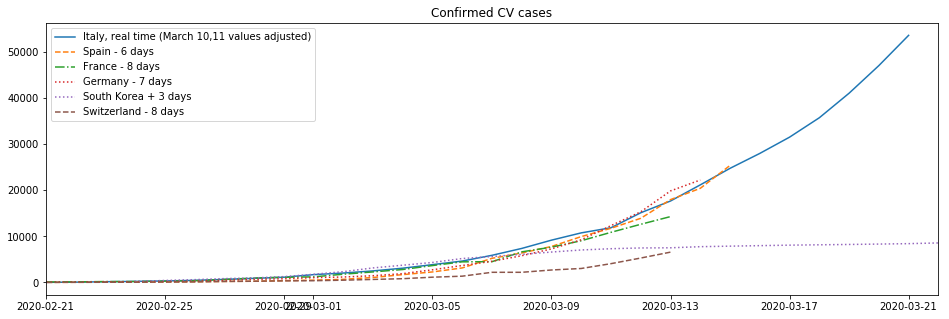

In [349]:
plt.figure(figsize=(16,5))
plt.plot(ts.Date[30:], ts.Italy[30:], '-', label = 'Italy, real time (March 10,11 values adjusted)')
plt.plot(ts.Date[30:] + timedelta(days=-6), ts.Spain[30:], '--', label = 'Spain - 6 days')
plt.plot(ts.Date[30:] + timedelta(days=-8), ts.France[30:], '-.',label = 'France - 8 days')
plt.plot(ts.Date[30:] + timedelta(days=-7), ts.Germany[30:], ls = 'dotted',label = 'Germany - 7 days')
plt.plot(ts.Date[30:] + timedelta(days=3), ts['Korea, South'][30:], ls = 'dotted',label = 'South Korea + 3 days')
plt.plot(ts.Date[30:] + timedelta(days=-8), ts['Switzerland'][30:], ls = '--',label = 'Switzerland - 8 days')

plt.xlim('2020-02-21','2020-03-22')
plt.title('Confirmed CV cases')
plt.legend()
#plt.savefig('CVcases.png')

In [350]:
SKpop, Frpop, Gepop, Itpop, Sppop, Irpop, Swpop = [51.5, 67, 82.8, 60.5, 46.7, 81.2, 8.6]

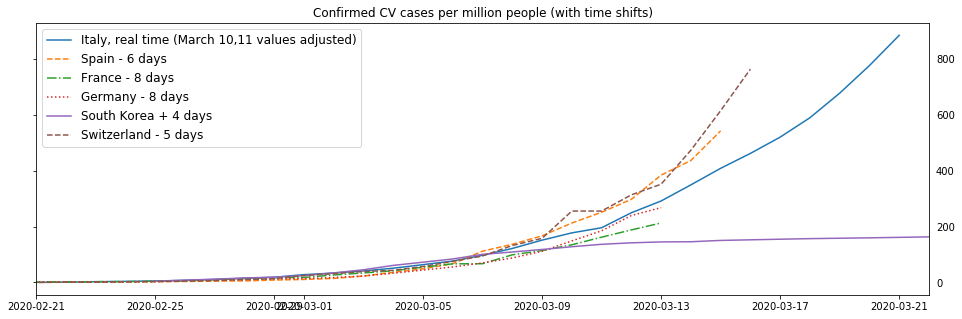

In [353]:
plt.figure(figsize=(16,5))
plt.plot(ts.Date[30:], ts.Italy[30:]/Itpop, '-', label = 'Italy, real time (March 10,11 values adjusted)')
plt.plot(ts.Date[30:] + timedelta(days=-6), ts.Spain[30:]/Sppop, '--', label = 'Spain - 6 days')
plt.plot(ts.Date[30:] + timedelta(days=-8), ts.France[30:]/Frpop, '-.',label = 'France - 8 days')
plt.plot(ts.Date[30:] + timedelta(days=-8), ts.Germany[30:]/Gepop, ls = 'dotted',label = 'Germany - 8 days')
plt.plot(ts.Date[30:] + timedelta(days=4), ts['Korea, South'][30:]/SKpop, ls = '-',label = 'South Korea + 4 days')
plt.plot(ts.Date[30:] + timedelta(days=-5), ts['Switzerland'][30:]/Swpop, ls = '--',label = 'Switzerland - 5 days')
plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
plt.xlim('2020-02-21','2020-03-22')
plt.title('Confirmed CV cases per million people (with time shifts)')
plt.legend(fontsize=12)
#plt.savefig('CVcasesMar14_shift.png')

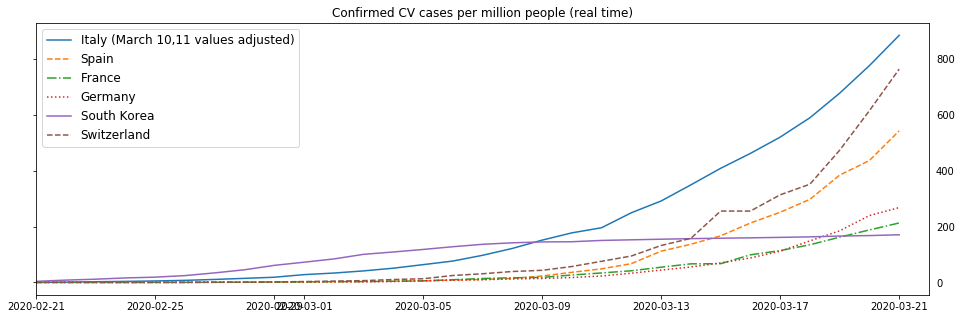

In [354]:
plt.figure(figsize=(16,5))
plt.plot(ts.Date[30:], ts.Italy[30:]/Itpop, '-', label = 'Italy (March 10,11 values adjusted)')
plt.plot(ts.Date[30:] + timedelta(days=0), ts.Spain[30:]/Sppop, '--', label = 'Spain')
plt.plot(ts.Date[30:] + timedelta(days=0), ts.France[30:]/Frpop, '-.',label = 'France')
plt.plot(ts.Date[30:] + timedelta(days=0), ts.Germany[30:]/Gepop, ls = 'dotted',label = 'Germany')
plt.plot(ts.Date[30:] + timedelta(days=0), ts['Korea, South'][30:]/SKpop, ls = '-',label = 'South Korea')
plt.plot(ts.Date[30:] + timedelta(days=0), ts['Switzerland'][30:]/Swpop, ls = '--',label = 'Switzerland')

plt.xlim('2020-02-21','2020-03-22')
plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
plt.title('Confirmed CV cases per million people (real time)')
plt.legend(fontsize=12)
#plt.savefig('CVcasesMar14.png')
#plt.savefig('CVcases.png')

Text(0.5, 1.0, 'Daily new cases/million people')

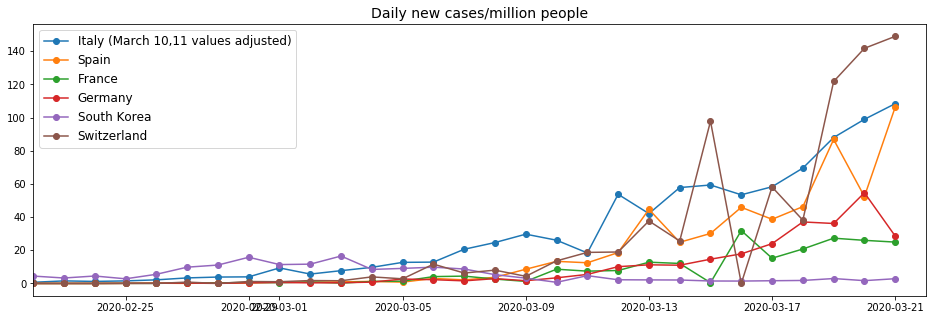

In [355]:
plt.figure(figsize=(16,5))
#plt.scatter(ts.Date[31:], (ts.Italy[31:].values - ts.Italy[30:].values[:-1])/Itpop, label = 'Italy')
plt.plot(ts.Date[31:], (ts.Italy[31:].values - ts.Italy[30:].values[:-1])/Itpop, '-o', label = 'Italy (March 10,11 values adjusted)')
plt.plot(ts.Date[31:], (ts.Spain[31:].values - ts.Spain[30:].values[:-1])/Sppop, '-o',label = 'Spain')
plt.plot(ts.Date[31:], (ts.France[31:].values - ts.France[30:].values[:-1])/Frpop, '-o',label = 'France')
plt.plot(ts.Date[31:], (ts.Germany[31:].values - ts.Germany[30:].values[:-1])/Gepop, '-o',label = 'Germany')
plt.plot(ts.Date[31:], (ts['Korea, South'][31:].values - ts['Korea, South'][30:].values[:-1])/SKpop, '-o',label = 'South Korea')
plt.plot(ts.Date[31:], (ts.Switzerland[31:].values - ts.Switzerland[30:].values[:-1])/Swpop, '-o',label = 'Switzerland')
plt.legend(fontsize=12)
plt.xlim('2020-02-22','2020-03-22')
plt.title('Daily new cases/million people', fontsize=14)
#plt.savefig('CVcasesMar14_dailies.png')

In [356]:
(ts.Italy[31:].values - ts.Italy[30:].values[:-1])

array([42, 93, 74, 93, 131, 202, 233, 240, 566, 342, 466, 587, 769, 778,
       1247, 1492, 1797, 1577, 1113, 3251, 2547, 3497, 3590, 3233, 3526,
       4207, 5322, 5986, 6557], dtype=object)